# HOUSE PRICE PREDICTION

#### IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import chardet
import warnings 
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

##### The file contains characters that cannot be decoded using the UTF-8 character encoding, which is the default encoding used by pandas when reading CSV files. we third-party libraries like chardet to automatically detect the encoding of the file.

In [3]:
file_path= '/Users/jagger/Documents/DMT PROJECT/new.csv'

In [4]:
with open(file_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
print(result)

{'encoding': 'GB2312', 'confidence': 0.99, 'language': 'Chinese'}


##### The detected encoding for new.csv file is 'GB2312,' which is a Chinese character encoding. 

In [7]:
# To read the CSV file with this encoding,

df=pd.read_csv(file_path,encoding='GB2312')

In [6]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [7]:
df.shape # (n_rows, n_columns)

(318851, 26)

In [8]:
df.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

##### df.info() gives the following detailss:
#####  1. total number of rows and columns 
#####  2. the names of columns 
#####  3. the count of non-null values for each column
#####  4. the datatype of each column (int64, float64, object)
#####  5. memory usage which is the amount of memory used by the Dataframe.

In [10]:
df.isnull().sum() #finds the number of missing values in each column

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

##### here, DOM column has 50% of missing values.

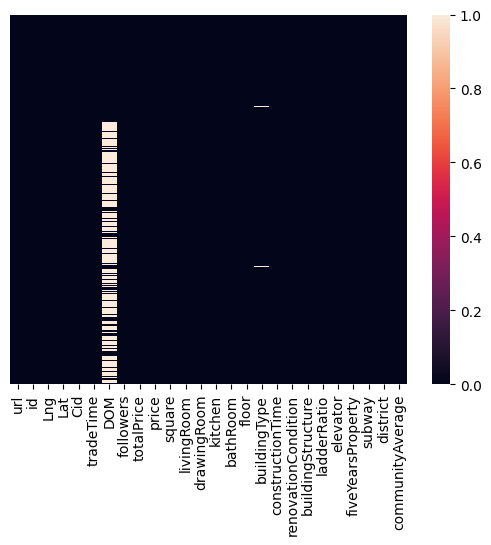

In [11]:
# to visualize the missing values, we can use heatmap

sns.heatmap(df.isnull(), yticklabels=False)
plt.show()

##### yticklabels=False is used to remove the y-axis labels which makes the heatmap cleaner. X-axis represents Columns of dataframes, Y-axis represents the rows pf Dataframe.

### REPLACE THE MISSING DATA 

In [12]:
df.drop(columns=['DOM'], axis=1, inplace =True)

In [13]:
df.shape

(318851, 25)

In [14]:
df.isnull().sum()

url                       0
id                        0
Lng                       0
Lat                       0
Cid                       0
tradeTime                 0
followers                 0
totalPrice                0
price                     0
square                    0
livingRoom                0
drawingRoom               0
kitchen                   0
bathRoom                  0
floor                     0
buildingType           2021
constructionTime          0
renovationCondition       0
buildingStructure         0
ladderRatio               0
elevator                 32
fiveYearsProperty        32
subway                   32
district                  0
communityAverage        463
dtype: int64

In [15]:
# REPLACE THE MISSING VALUES WITH MEDIAN VALUE
df['buildingType'].fillna(df.buildingType.mode(), inplace=True)

In [16]:
df['elevator'].fillna(df.elevator.mode(), inplace=True)

In [17]:
df['fiveYearsProperty'].fillna(df.fiveYearsProperty.mode(), inplace=True)

In [18]:
df['subway'].fillna(df.subway.mode(),inplace=True)

In [19]:
df['communityAverage'].fillna(df.communityAverage.mode(), inplace=True)

#### DATA TYPE OF COLUMNS 

In [20]:
df['livingRoom'].unique()

array([2, 3, 1, 4, 5, 6, 9, 0, 7, 8, '1', '4', '3', '2', '5', '7', '9',
       '6', '0', '#NAME?', '8'], dtype=object)

In [21]:
df.floor.unique()

array(['高 26', '高 22', '中 4', '底 21', '中 6', '中 8', '高 6', '高 10', '中 23',
       '底 11', '底 3', '高 24', '低 23', '中 19', '高 18', '低 25', '中 12',
       '中 14', '中 30', '中 27', '中 5', '低 18', '底 28', '中 11', '低 9',
       '顶 7', '顶 27', '低 6', '中 17', '顶 6', '中 24', '中 15', '底 5', '中 29',
       '顶 19', '顶 5', '中 9', '低 22', '顶 18', '低 16', '高 13', '高 9',
       '高 17', '底 6', '中 28', '低 26', '底 15', '高 16', '底 2', '低 7',
       '中 13', '低 33', '底 14', '高 15', '底 4', '顶 11', '中 32', '顶 16',
       '底 18', '顶 17', '低 14', '低 10', '底 20', '高 12', '低 31', '低 30',
       '低 19', '低 12', '中 10', '中 16', '顶 20', '底 19', '中 31', '低 13',
       '底 10', '高 25', '中 21', '中 20', '高 20', '低 21', '低 24', '顶 4',
       '高 21', '高 7', '中 22', '底 1', '中 7', '底 8', '顶 15', '中 18', '高 28',
       '顶 14', '顶 13', '低 20', '底 26', '低 17', '顶 24', '底 23', '顶 3',
       '顶 21', '底 24', '高 30', '高 11', '底 25', '高 27', '底 9', '低 11',
       '低 28', '低 15', '顶 26', '低 34', '顶 12', '中 25', '高 8', '底 17',
       '

##### floor has chinese character in it. so we need to change the datatype 

In [22]:
df.bathRoom.unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 2006, 2003, 1990, 2000, 1996, 2005, 2011,
       '1', '2', '0', '3', '4', '5', '未知', 1994, 2004, '2003', '7'],
      dtype=object)

In [23]:
df.drawingRoom.unique()

array([1, 2, 0, 4, 3, 5, '0', '1', '2', '3', '4', '中 14', '中 15', '中 16',
       '中 6', '高 14', '顶 6', '低 6', '低 16', '高 12', '低 15', '5', '高 6',
       '底 28', '底 11', '中 24', '底 20', '中 22'], dtype=object)

In [24]:
#we only need the year of selling and buying.
df.tradeTime.unique()

array(['2016-08-09', '2016-07-28', '2016-12-11', ..., '2012-01-28',
       '2011-01-30', '2009-01-11'], dtype=object)

In [25]:
def Trade_Time(x):
    return x[0:4] #returns first four characters in the date

df['tradeTime'] = df['tradeTime'].apply(Trade_Time)

In [26]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [27]:
df.tradeTime = pd.to_numeric(df.tradeTime)

In [28]:
df.livingRoom=df.livingRoom.apply(pd.to_numeric,errors='coerce')
# coerce - if it cannot be changed to numeric, the value must be set to null

In [29]:
df.drawingRoom = df.drawingRoom.apply(pd.to_numeric,errors='coerce')

In [30]:
df.bathRoom = df.bathRoom.apply(pd.to_numeric,errors='coerce')

In [31]:
df.constructionTime = df.constructionTime.apply(pd.to_numeric , errors = 'coerce')

In [32]:
#checking for clean data
df.livingRoom.unique()

array([ 2.,  3.,  1.,  4.,  5.,  6.,  9.,  0.,  7.,  8., nan])

In [33]:
# for dropping unnecessary columns 
#df =df.drop(columns=['floor','url','id','Cid','price'])

In [34]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016,106,415.0,31680,131.00,2.0,1.0,1,1.0,高 26,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016,126,575.0,43436,132.38,2.0,2.0,1,2.0,高 22,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016,48,1030.0,52021,198.00,3.0,2.0,1,3.0,中 4,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016,138,297.5,22202,134.00,3.0,1.0,1,1.0,底 21,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016,286,392.0,48396,81.00,2.0,1.0,1,1.0,中 6,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0


mode- categorical
median and mean - numerical

In [35]:
newlist_floor = [] #creating a new list to store just the floor numbers
for i in list(df['floor']):
    temp = i.split(" ") #splits the chinese element and the number - chinese element has index 0 and the number has index 1
    if len(temp)>1: # if a number is followed by a chinese element
        newlist_floor.append(temp[1]) #append the number
    else:
        newlist_floor.append('NaN') #append NaN
    #newlist_floor.append(temp[1])

In [36]:
df['floor'] = newlist_floor

In [37]:
df

,url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016,106,415.0,31680,131.00,2.0,1.0,1,1.0,26,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016,126,575.0,43436,132.38,2.0,2.0,1,2.0,22,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016,48,1030.0,52021,198.00,3.0,2.0,1,3.0,4,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016,138,297.5,22202,134.00,3.0,1.0,1,1.0,21,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016,286,392.0,48396,81.00,2.0,1.0,1,1.0,6,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016,8,350.0,20580,170.07,3.0,2.0,1,2.0,5,4.0,2003.0,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016,1,108.8,31006,35.09,1.0,0.0,1,1.0,24,1.0,2009.0,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016,2,359.0,35138,102.17,2.0,2.0,1,2.0,7,4.0,2000.0,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016,4,720.0,40373,178.34,4.0,2.0,1,2.0,5,4.0,2003.0,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [38]:
#drop all unnecessary columns

df = df.drop(columns=['url','id','Cid'])
df.head(10)

,Lng,Lat,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,2016,106,415.0,31680,131.00,2.0,1.0,1,1.0,26,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,2016,126,575.0,43436,132.38,2.0,2.0,1,2.0,22,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,2016,48,1030.0,52021,198.00,3.0,2.0,1,3.0,4,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,2016,138,297.5,22202,134.00,3.0,1.0,1,1.0,21,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,2016,286,392.0,48396,81.00,2.0,1.0,1,1.0,6,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0
5,116.466280,39.991363,2016,57,275.6,52000,53.00,1.0,0.0,1,1.0,8,4.0,2005.0,3,6,0.333,1.0,1.0,0.0,7,67738.0
6,116.482586,39.891991,2016,167,275.0,37672,73.00,2.0,1.0,1,1.0,6,4.0,1997.0,4,2,0.500,0.0,0.0,0.0,7,50112.0
7,116.453917,39.881534,2016,138,800.0,49521,161.55,3.0,2.0,1,2.0,22,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0
8,116.555729,40.162058,2016,218,134.0,27917,48.00,1.0,0.0,1,1.0,10,3.0,2009.0,1,2,0.333,0.0,0.0,0.0,13,44235.0
9,116.453086,39.898397,2016,134,380.0,55883,68.00,1.0,0.0,0,0.0,23,1.0,2009.0,4,6,0.308,1.0,1.0,1.0,1,78590.0


#### CATEGORICAL DATA 

##### to handle the categorical data, we need to perform one-hot encoding It is necessary in cases where machine learning algorithms require numerical input and cannot directly work with categorical variables. 

In [39]:
print(df.buildingType.unique())

[1.    4.    3.      nan 2.    0.5   0.333 0.125 0.25  0.429 0.048 0.375
 0.667]


In [40]:
df.renovationCondition.unique()

array([3, 4, 1, 2, 0])

In [41]:
df.buildingStructure.unique()

array([6, 2, 4, 1, 5, 3, 0])

here in buildingType we has uncessary decimal data which needs to be cleaned. here, the decimal data seems to be less than 1. so we can write a code to remove all data less than 1.

In [42]:
df=df[df.buildingType >= 1]

In [43]:
df.buildingType.unique()

array([1., 4., 3., 2.])

In [44]:
df.shape

(316798, 22)

now we need to save this copy to avoid redundancies 

In [45]:
df_copy=df.copy()

In [46]:
#now to perform one-hot encoding for categorical columns, we can create a list 
one_hot_enc_cols = ['renovationCondition','buildingStructure',
                    'buildingType','buildingType','district','elevator']

In [47]:
df=pd.get_dummies(data=df,columns=one_hot_enc_cols,drop_first=True)

In [48]:
df.head()

,Lng,Lat,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,ladderRatio,fiveYearsProperty,subway,communityAverage,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,buildingType_2.0,buildingType_3.0,buildingType_4.0,buildingType_2.0,buildingType_3.0,buildingType_4.0,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13,elevator_1.0
0,116.475489,40.019520,2016,106,415.0,31680,131.00,2.0,1.0,1,1.0,26,2005.0,0.217,0.0,1.0,56021.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,116.453917,39.881534,2016,126,575.0,43436,132.38,2.0,2.0,1,2.0,22,2004.0,0.667,1.0,0.0,71539.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,116.561978,39.877145,2016,48,1030.0,52021,198.00,3.0,2.0,1,3.0,4,2005.0,0.500,0.0,0.0,48160.0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,116.438010,40.076114,2016,138,297.5,22202,134.00,3.0,1.0,1,1.0,21,2008.0,0.273,0.0,0.0,51238.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,116.428392,39.886229,2016,286,392.0,48396,81.00,2.0,1.0,1,1.0,6,1960.0,0.333,1.0,1.0,62588.0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


now the dataframe is one-hot encoded categorical columns as indicated by columns like renovationCondition_2, buildingStructure_2, district_2, and so on.

In [49]:
df.shape

(316798, 44)

In [50]:
df.columns

Index(['Lng', 'Lat', 'tradeTime', 'followers', 'totalPrice', 'price', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'constructionTime', 'ladderRatio', 'fiveYearsProperty', 'subway',
       'communityAverage', 'renovationCondition_2', 'renovationCondition_3',
       'renovationCondition_4', 'buildingStructure_2', 'buildingStructure_3',
       'buildingStructure_4', 'buildingStructure_5', 'buildingStructure_6',
       'buildingType_2.0', 'buildingType_3.0', 'buildingType_4.0',
       'buildingType_2.0', 'buildingType_3.0', 'buildingType_4.0',
       'district_2', 'district_3', 'district_4', 'district_5', 'district_6',
       'district_7', 'district_8', 'district_9', 'district_10', 'district_11',
       'district_12', 'district_13', 'elevator_1.0'],
      dtype='object')

HEATMAP VISUALIZATION is done using the seaborn library

In [51]:
df1=df[['Lng','Lat','tradeTime','totalPrice','followers','followers','livingRoom','drawingRoom','kitchen',
    'bathRoom','square','communityAverage','ladderRatio']]

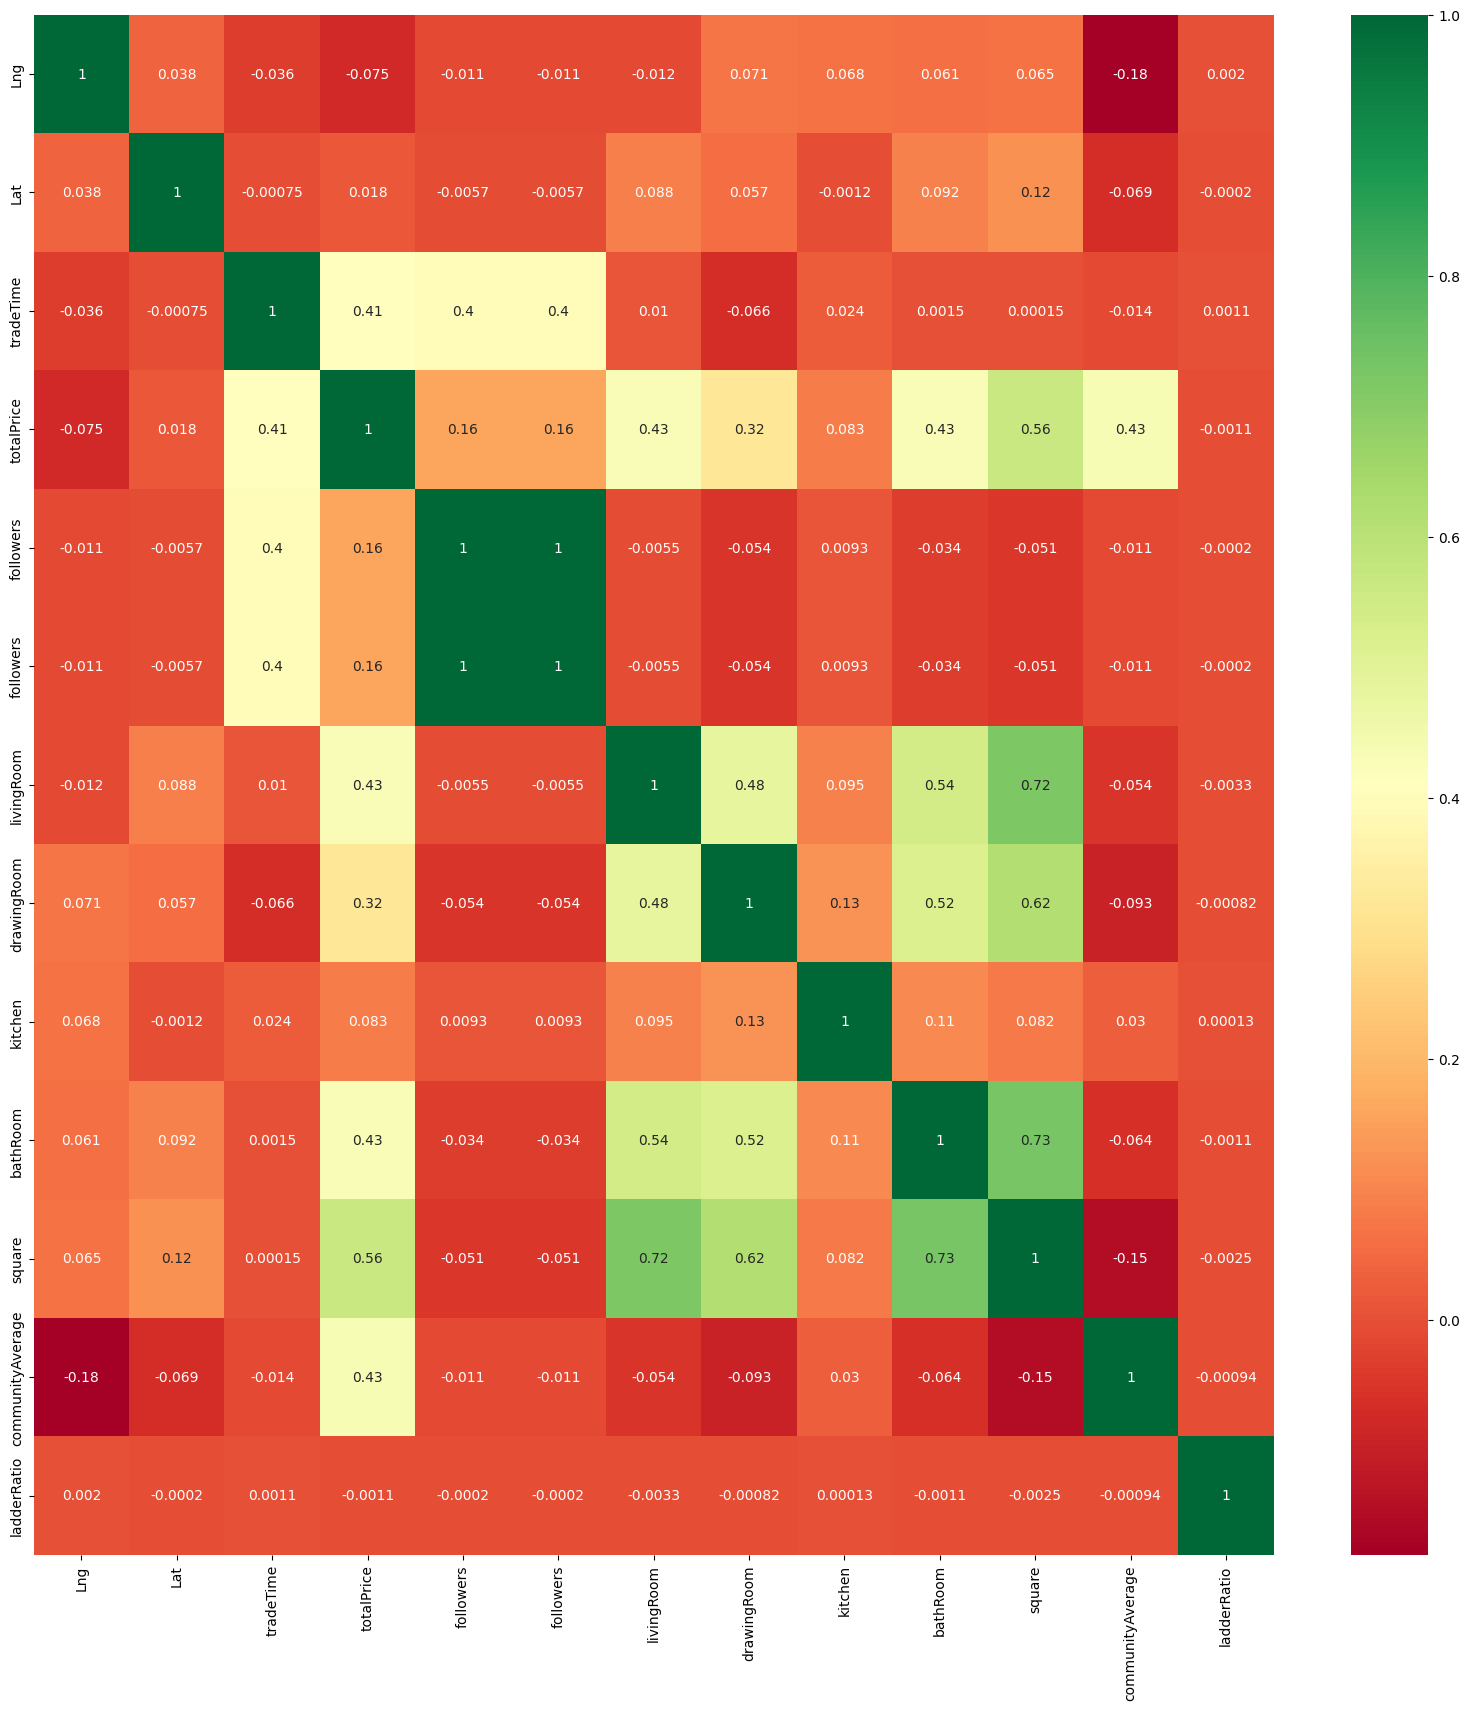

In [52]:
plt.figure(figsize=(20,20)) #specifies the size of the map
sns.heatmap(df1.corr(),annot=True,cmap="RdYlGn")
plt.show() #shows the plot

- here, figsize=(20,20) signifies the dimensions of heatmap i.e., 20x20
- df1 columns are used in df1.corr() function to create heatmap
- annot=True means, the numerical values must be displayed 

##### OBSERVATIONS OF HEATMAP 

- From the heatmap, we can see that toalPrice and square footage has a strong positive correlation  (0.56)
- square is correlated with bathroom (0.73)
- totalPrice is negetively correlated with ladderRatio

In [53]:
df.to_csv("After_EDA.csv") #save the updated data in csv format

### FEATURE SELECTION 

Selecting the best feature for the model is important. hence we perform feature engineering process here. We can find that "totalPrice" from the heatmap has strong correlation

In [54]:
df.totalPrice.describe()

count    316798.000000
mean        347.800230
std         224.256035
min           0.100000
25%         205.000000
50%         293.600000
75%         425.000000
max        4900.000000
Name: totalPrice, dtype: float64

- count is the number of non-missing values. the result says there are 316798 values.
- mean is the average value of totalPrice which is 347.800
- std is the standard deviation . higher std means the data is spread highly around the mean
- min is the minimum value, in totalPrice the minimum value is 0.100


QUARTILES divides the dataset into equal parts used to understand the distribution and spread of datapoints 
- First Quartile (Q1): The first quartile, also known as the 25th percentile, is the value below which 25% of the data falls.
- Second Quartile (Q2): The second quartile, also known as the 50th percentile, is the median of the data. It's the middle value when the data is sorted
- Third Quartile (Q3): The third quartile, also known as the 75th percentile, is the value below which 75% of the data falls.

In [55]:
# we have Q1 and Q3 . we need to find IQR
Q1 = 205.00
Q3 = 425.00
IQR = Q3-Q1
print("The Inter Quartile Range of totalPrice is ",IQR)

The Inter Quartile Range of totalPrice is  220.0


In [56]:
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
print("the upper limit of totalPrice is ",upper_limit)
print("the lower limit of totalPrice is ",lower_limit)

the upper limit of totalPrice is  755.0
the lower limit of totalPrice is  -125.0


Now we need to remove the outliers from the dataset

<Axes: ylabel='totalPrice'>

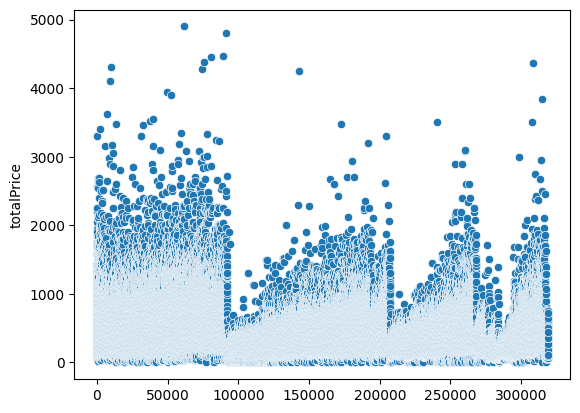

In [57]:
sns.scatterplot(data=df.totalPrice)

In [58]:
#only points that fall withing this range lower_limit <x<upper_limit ,will be kept
#df= df[df.totalPrice <= upper_limit]
#df = df[df.totalPrice >= lower_limit]

filtered_df = df[(df.totalPrice >= lower_limit) & (df.totalPrice <= upper_limit)]

In [59]:
#sns.scatterplot(data = df.totalPrice)

In [60]:
#df.shape

earlier, the shape of the df was (316798, 44). Now the shape of df is (301499, 44).

In [61]:
df.shape  #shape of original dataframe

(316798, 44)

In [62]:
filtered_df.shape #shape of filtered dataframe after outlier removal

(301499, 44)

#### Important features of the model

In [63]:
#now we need to figure out the important features of the model
df.columns

Index(['Lng', 'Lat', 'tradeTime', 'followers', 'totalPrice', 'price', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'constructionTime', 'ladderRatio', 'fiveYearsProperty', 'subway',
       'communityAverage', 'renovationCondition_2', 'renovationCondition_3',
       'renovationCondition_4', 'buildingStructure_2', 'buildingStructure_3',
       'buildingStructure_4', 'buildingStructure_5', 'buildingStructure_6',
       'buildingType_2.0', 'buildingType_3.0', 'buildingType_4.0',
       'buildingType_2.0', 'buildingType_3.0', 'buildingType_4.0',
       'district_2', 'district_3', 'district_4', 'district_5', 'district_6',
       'district_7', 'district_8', 'district_9', 'district_10', 'district_11',
       'district_12', 'district_13', 'elevator_1.0'],
      dtype='object')

In [69]:
df.isnull().sum()

Lng                          0
Lat                          0
tradeTime                    0
followers                    0
totalPrice                   0
price                        0
square                       0
livingRoom                   0
drawingRoom                  0
kitchen                      0
bathRoom                     0
floor                        0
constructionTime         18808
ladderRatio                  0
fiveYearsProperty            0
subway                       0
communityAverage           350
renovationCondition_2        0
renovationCondition_3        0
renovationCondition_4        0
buildingStructure_2          0
buildingStructure_3          0
buildingStructure_4          0
buildingStructure_5          0
buildingStructure_6          0
buildingType_2.0             0
buildingType_3.0             0
buildingType_4.0             0
buildingType_2.0             0
buildingType_3.0             0
buildingType_4.0             0
district_2                   0
district

In [70]:
df.constructionTime.unique()

array([2005., 2004., 2008., 1960., 1997., 2009., 1991., 2001., 1990.,
       2011., 2000., 1998., 2010., 1996., 1993., 2006., 2002.,   nan,
       2012., 1989., 2003., 2007., 1994., 1984., 1992., 2014., 1985.,
       1999., 1979., 1981., 1976., 1982., 1975., 1983., 1986., 1995.,
       1965., 2013., 1988., 1987., 2015., 1955., 1980., 1978., 1958.,
       1970., 1956., 1977., 1964., 1963., 1967., 2016., 1974., 1973.,
       1959., 1954., 1962., 1966., 1957., 1944., 1972., 1971., 1953.,
       1968., 1961., 1950., 1952., 1969., 1934., 1914.])

In [71]:
df["constructionTime"].fillna(0, inplace=True)

In [72]:
df.communityAverage.unique()

array([ 56021.,  71539.,  48160., ..., 125656., 145316., 130768.])

In [73]:
df['communityAverage'].fillna(0, inplace=True)

In [74]:
df.isnull().sum()

Lng                      0
Lat                      0
tradeTime                0
followers                0
totalPrice               0
price                    0
square                   0
livingRoom               0
drawingRoom              0
kitchen                  0
bathRoom                 0
floor                    0
constructionTime         0
ladderRatio              0
fiveYearsProperty        0
subway                   0
communityAverage         0
renovationCondition_2    0
renovationCondition_3    0
renovationCondition_4    0
buildingStructure_2      0
buildingStructure_3      0
buildingStructure_4      0
buildingStructure_5      0
buildingStructure_6      0
buildingType_2.0         0
buildingType_3.0         0
buildingType_4.0         0
buildingType_2.0         0
buildingType_3.0         0
buildingType_4.0         0
district_2               0
district_3               0
district_4               0
district_5               0
district_6               0
district_7               0
d

In [75]:
X = df.drop(['totalPrice'],axis=1)
y = df.totalPrice